# Titanic
https://www.kaggle.com/c/titanic

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dataset=pd.read_csv('./input/titanic/train.csv')
testset=pd.read_csv('./input/titanic/test.csv')

In [8]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# 'Survived' deleted
testset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

0, PassengerId：乘客的数字id

1, Survived：幸存(1)、死亡(0)

2, Pclass：乘客船层—1st = Upper，2nd = Middle， 3rd = Lower

3, Name

4, Sex

5, Age

6, SibSp：兄弟姐妹和配偶的数量。

7, Parch：父母和孩子的数量。

8, Ticket：船票号码。

9, Fare：船票价钱。

10, Cabin：船舱。

11, Embarked：从哪个地方登上泰坦尼克号。 C = Cherbourg, Q = Queenstown, S = Southampton

In [10]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
dataset.dtypes    #obj is str, if we want to use that col as an attribute, we must convert it to numders

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
dataset.describe()   #年龄有缺失，和前面891存活不一样

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 选特征

0    468
1    109
Name: Survived, dtype: int64
1    233
0     81
Name: Survived, dtype: int64


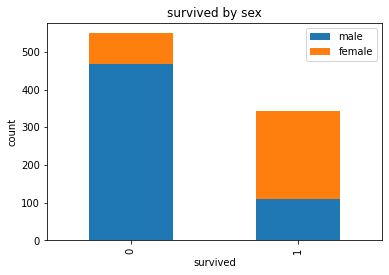

In [21]:
#sex?  ✅
survived_m=dataset.Survived[dataset.Sex=='male'].value_counts()
survived_f=dataset.Survived[dataset.Sex=='female'].value_counts()
print(survived_m)
print(survived_f)
df=pd.DataFrame({'male':survived_m,'female':survived_f})
df.plot(kind='bar',stacked=True)
plt.title("survived by sex")
plt.xlabel("survived") 
plt.ylabel("count")
plt.show()

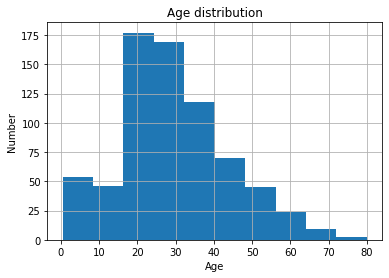

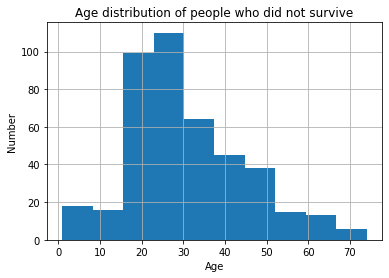

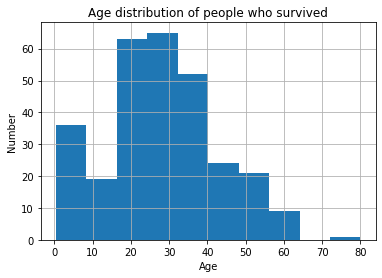

In [24]:
#age?  ✅
# histgram 会自动把数据切段，不一定是10为一段
dataset['Age'].hist()
plt.ylabel("Number") 
plt.xlabel("Age") 
plt.title('Age distribution')
plt.show() 


dataset[dataset.Survived==0]['Age'].hist()  
plt.ylabel("Number") 
plt.xlabel("Age") 
plt.title('Age distribution of people who did not survive')
plt.show()

dataset[dataset.Survived==1]['Age'].hist()  
plt.ylabel("Number") 
plt.xlabel("Age") 
plt.title('Age distribution of people who survived')
plt.show()

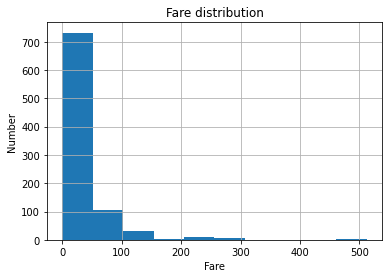

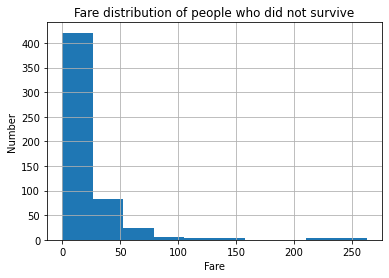

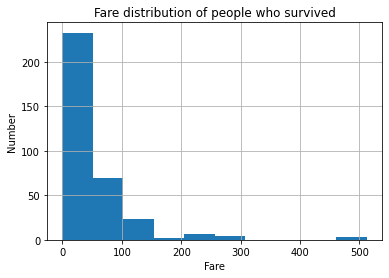

In [25]:
#Fare？ ✅
dataset['Fare'].hist()  
plt.ylabel("Number") 
plt.xlabel("Fare") 
plt.title('Fare distribution')
plt.show() 

dataset[dataset.Survived==0]['Fare'].hist()  
plt.ylabel("Number") 
plt.xlabel("Fare") 
plt.title('Fare distribution of people who did not survive')
plt.show()

dataset[dataset.Survived==1]['Fare'].hist()  
plt.ylabel("Number") 
plt.xlabel("Fare") 
plt.title('Fare distribution of people who survived')
plt.show()

p1  p2   p3
0   80  97  372
1  136  87  119


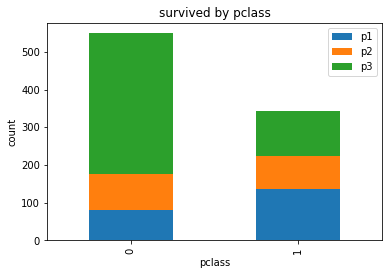

In [27]:
# Pclass  ✅
Survived_p1 = dataset.Survived[dataset['Pclass'] == 1].value_counts()
Survived_p2 = dataset.Survived[dataset['Pclass'] == 2].value_counts()
Survived_p3 = dataset.Survived[dataset['Pclass'] == 3].value_counts()

df=pd.DataFrame({'p1':Survived_p1, 'p2':Survived_p2, 'p3':Survived_p3})
print(df)
df.plot(kind='bar', stacked=True)
plt.title("survived by pclass")
plt.xlabel("pclass") 
plt.ylabel("count")
plt.show()

0    427
1    217
Name: Survived, dtype: int64


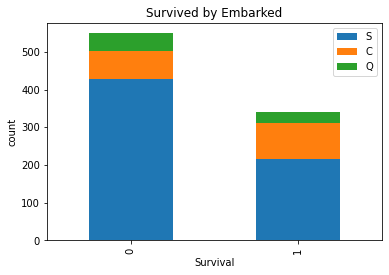

In [28]:
# Embarked   ✅
Survived_S = dataset.Survived[dataset['Embarked'] == 'S'].value_counts()
Survived_C = dataset.Survived[dataset['Embarked'] == 'C'].value_counts()
Survived_Q = dataset.Survived[dataset['Embarked'] == 'Q'].value_counts()

print(Survived_S)
df = pd.DataFrame({'S':Survived_S, 'C':Survived_C, 'Q':Survived_Q})
df.plot(kind='bar', stacked=True)
plt.title("Survived by Embarked")
plt.xlabel("Survival") 
plt.ylabel("count")
plt.show()

保留下有效数据：
pclass, sex, age, fare, embarked

作业：SibSp？

## 分离label 和 训练数据

In [43]:
label=dataset.loc[:,'Survived']
data=dataset.loc[:,['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
testdat=testset.loc[:,['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

print(data.shape)
print(data)

(891, 5)
     Pclass     Sex   Age      Fare Embarked
0         3    male  22.0    7.2500        S
1         1  female  38.0   71.2833        C
2         3  female  26.0    7.9250        S
3         1  female  35.0   53.1000        S
4         3    male  35.0    8.0500        S
5         3    male   NaN    8.4583        Q
6         1    male  54.0   51.8625        S
7         3    male   2.0   21.0750        S
8         3  female  27.0   11.1333        S
9         2  female  14.0   30.0708        C
10        3  female   4.0   16.7000        S
11        1  female  58.0   26.5500        S
12        3    male  20.0    8.0500        S
13        3    male  39.0   31.2750        S
14        3  female  14.0    7.8542        S
15        2  female  55.0   16.0000        S
16        3    male   2.0   29.1250        Q
17        2    male   NaN   13.0000        S
18        3  female  31.0   18.0000        S
19        3  female   NaN    7.2250        C
20        2    male  35.0   26.0000        S
2

## 处理空数据
- 空的特别多，直接丢掉
- 空的不多，进行填充
    - fillna: median中位数 ✅， mean，上一个值


In [44]:
def fill_NAN(data):  
    data_copy = data.copy(deep=True) # 如果没有deep=True, 那只是多加了一个reference
    data_copy.loc[:,'Age'] = data_copy['Age'].fillna(data_copy['Age'].median())
    data_copy.loc[:,'Fare'] = data_copy['Fare'].fillna(data_copy['Fare'].median())
    data_copy.loc[:,'Pclass'] = data_copy['Pclass'].fillna(data_copy['Pclass'].median())
    data_copy.loc[:,'Sex'] = data_copy['Sex'].fillna('female') #不是数字，随便填，填unknown也可
    data_copy.loc[:,'Embarked'] = data_copy['Embarked'].fillna('S') #因为s最多
    return data_copy


data_no_nan = fill_NAN(data)
testdat_no_nan = fill_NAN(testdat)

print(testdat.isnull().values.any())    
print(data.isnull().values.any())   

print(testdat_no_nan.isnull().values.any())
print(data_no_nan.isnull().values.any())    

print(data_no_nan)

# print(data)

True
True
False
False
     Pclass     Sex   Age      Fare Embarked
0         3    male  22.0    7.2500        S
1         1  female  38.0   71.2833        C
2         3  female  26.0    7.9250        S
3         1  female  35.0   53.1000        S
4         3    male  35.0    8.0500        S
5         3    male  28.0    8.4583        Q
6         1    male  54.0   51.8625        S
7         3    male   2.0   21.0750        S
8         3  female  27.0   11.1333        S
9         2  female  14.0   30.0708        C
10        3  female   4.0   16.7000        S
11        1  female  58.0   26.5500        S
12        3    male  20.0    8.0500        S
13        3    male  39.0   31.2750        S
14        3  female  14.0    7.8542        S
15        2  female  55.0   16.0000        S
16        3    male   2.0   29.1250        Q
17        2    male  28.0   13.0000        S
18        3  female  31.0   18.0000        S
19        3  female  28.0    7.2250        C
20        2    male  35.0   26.00

## 处理Sex 
（str -> num）

In [45]:
print(data_no_nan['Sex'].isnull().values.any())

def transfer_sex(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Sex'] == 'female', 'Sex'] = 0
    data_copy.loc[data_copy['Sex'] == 'male', 'Sex'] = 1
    return data_copy

data_after_sex = transfer_sex(data_no_nan)
testdat_after_sex = transfer_sex(testdat_no_nan)
print(testdat_after_sex)

False
     Pclass  Sex   Age      Fare Embarked
0         3    1  34.5    7.8292        Q
1         3    0  47.0    7.0000        S
2         2    1  62.0    9.6875        Q
3         3    1  27.0    8.6625        S
4         3    0  22.0   12.2875        S
5         3    1  14.0    9.2250        S
6         3    0  30.0    7.6292        Q
7         2    1  26.0   29.0000        S
8         3    0  18.0    7.2292        C
9         3    1  21.0   24.1500        S
10        3    1  27.0    7.8958        S
11        1    1  46.0   26.0000        S
12        1    0  23.0   82.2667        S
13        2    1  63.0   26.0000        S
14        1    0  47.0   61.1750        S
15        2    0  24.0   27.7208        C
16        2    1  35.0   12.3500        Q
17        3    1  21.0    7.2250        C
18        3    0  27.0    7.9250        S
19        3    0  45.0    7.2250        C
20        1    1  55.0   59.4000        C
21        3    1   9.0    3.1708        S
22        1    0  27.0   31.

## 处理Embarked

In [46]:
def transfer_embark(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Embarked'] == 'S', 'Embarked'] = 0
    data_copy.loc[data_copy['Embarked'] == 'C', 'Embarked'] = 1
    data_copy.loc[data_copy['Embarked'] == 'Q', 'Embarked'] = 2
    return data_copy


In [47]:
data_after_embarked = transfer_embark(data_after_sex)
testdat_after_embarked = transfer_embark(testdat_after_sex)
print(testdat_after_embarked)

Pclass  Sex   Age      Fare  Embarked
0         3    1  34.5    7.8292         2
1         3    0  47.0    7.0000         0
2         2    1  62.0    9.6875         2
3         3    1  27.0    8.6625         0
4         3    0  22.0   12.2875         0
5         3    1  14.0    9.2250         0
6         3    0  30.0    7.6292         2
7         2    1  26.0   29.0000         0
8         3    0  18.0    7.2292         1
9         3    1  21.0   24.1500         0
10        3    1  27.0    7.8958         0
11        1    1  46.0   26.0000         0
12        1    0  23.0   82.2667         0
13        2    1  63.0   26.0000         0
14        1    0  47.0   61.1750         0
15        2    0  24.0   27.7208         1
16        2    1  35.0   12.3500         2
17        3    1  21.0    7.2250         1
18        3    0  27.0    7.9250         0
19        3    0  45.0    7.2250         1
20        1    1  55.0   59.4000         1
21        3    1   9.0    3.1708         0
22        1    0

## Training the data

In [49]:
data_now = data_after_embarked
testdat_now = testdat_after_embarked

from sklearn.model_selection import train_test_split


train_data,val_data,train_labels,val_labels=train_test_split(data_now,label,random_state=0,test_size=0.2)

In [50]:
print(train_data.shape, val_data.shape, train_labels.shape, val_labels.shape)

(712, 5) (179, 5) (712,) (179,)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_range = range(1, 51)
k_scores = []
for K in k_range:
    clf=KNeighborsClassifier(n_neighbors = K)
    clf.fit(train_data,train_labels)
    print('K=', K)
    predictions=clf.predict(val_data)
    score = accuracy_score(val_labels,predictions)
    print(score)
    k_scores.append(score)

K= 1
0.6703910614525139
K= 2
0.6871508379888268
K= 3
0.7039106145251397
K= 4
0.6983240223463687
K= 5
0.7318435754189944
K= 6
0.7150837988826816
K= 7
0.7430167597765364
K= 8
0.6983240223463687
K= 9
0.7318435754189944
K= 10
0.7374301675977654
K= 11
0.7318435754189944
K= 12
0.7262569832402235
K= 13
0.7262569832402235
K= 14
0.7206703910614525
K= 15
0.7318435754189944
K= 16
0.7039106145251397
K= 17
0.7374301675977654
K= 18
0.7262569832402235
K= 19
0.7374301675977654
K= 20
0.7374301675977654
K= 21
0.7597765363128491
K= 22
0.7486033519553073
K= 23
0.7541899441340782
K= 24
0.7430167597765364
K= 25
0.7597765363128491
K= 26
0.7430167597765364
K= 27
0.7541899441340782
K= 28
0.7541899441340782
K= 29
0.7597765363128491
K= 30
0.7541899441340782
K= 31
0.7541899441340782
K= 32
0.7541899441340782
K= 33
0.7653631284916201
K= 34
0.7597765363128491
K= 35
0.7653631284916201
K= 36
0.7541899441340782
K= 37
0.7374301675977654
K= 38
0.7541899441340782
K= 39
0.7541899441340782
K= 40
0.7486033519553073
K= 41
0.7

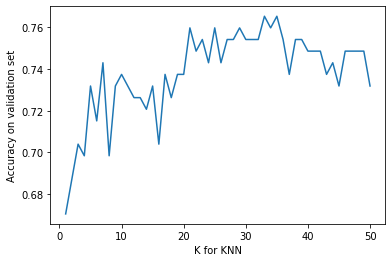

[ 0  1  3  7  2 15  5 13 17 11 12 44 14 49  8 10  4  9 42 36 16 19 18 43
  6 25 23 45 48 46 41 21 40 39 47 38 37 31 30 29 27 26 22 35 33 28 20 24
 34 32]


In [53]:
plt.plot(k_range, k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Accuracy on validation set')
plt.show()
print(np.array(k_scores).argsort())      # 准确度最高的k是32 （33）

In [55]:
# 预测测试实验数据

clf=KNeighborsClassifier(n_neighbors=33)
clf.fit(data_now,label)
result=clf.predict(testdat_now)
print(result)   # 0没活，1活了

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 0]


In [56]:
df = pd.DataFrame({"PassengerId": testset['PassengerId'],"Survived": result})
df.to_csv('submission.csv',header=True, index=False)

In [ ]:
print(train_data.shape, val_data.shape, train_labels.shape, val_labels.shape)